<a href="https://colab.research.google.com/github/Electra89/Supervised_ML_Crop_Yield_Prediction/blob/main/Supervised_ML_Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Supervised Machine Learning Crop Yield Prediction



##### **Project Type**    - Supervised Machine Learning
##### **Contribution**    - Individual
##### **Name**           -  Shreyas Mhatre


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[Click here to open Github repo.](https://github.com/Electra89/Supervised_ML_Crop_Yield_Prediction)

# **Problem Statement**


> The science of training machines to learn and produce models for future predictions is widely used, and not for nothing. Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

> Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset
Dataset_path ="https://raw.githubusercontent.com/Electra89/Supervised_ML_Crop_Yield_Prediction/main/Crop_Yield_Dataset.csv"
df=pd.read_csv(Dataset_path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of Rows: {df.shape[0]} \nNumber of Columns: {df.shape[1]}")

Number of Rows: 28242 
Number of Columns: 8


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Duplicate Value Counts: {df.duplicated().sum()}")

Duplicate Value Counts: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

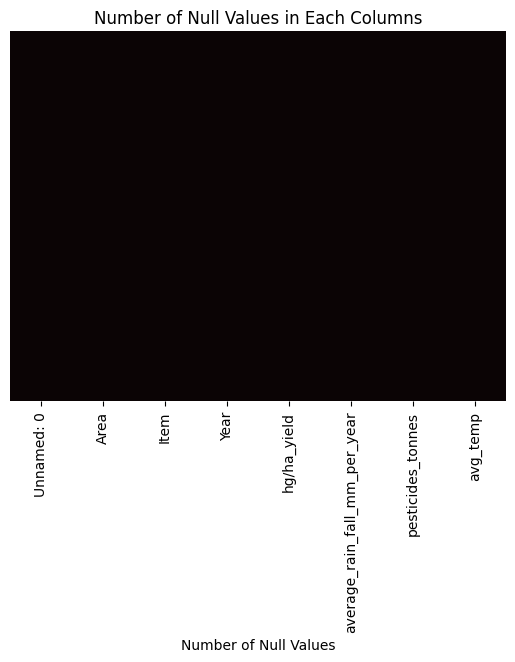

In [ ]:
# Visualizing the missing values
null_counts = df.isnull().sum()

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')
plt.title('Number of Null Values in Each Columns')
plt.xlabel('Number of Null Values')
plt.show()

### What did you know about your dataset?

> - Number of Entries: The dataset consists of 28242 entries, ranging from index 0 to 28241.
> - Columns: There are 8 columns in the dataset.
> - Data Types:
  - Most of the columns (6 out of 8) are of the int64 & float64 data type.
  - Only the Item and Area columns are of the object data type.
> - Missing Values: There doesn't appear to be any missing values in the dataset as each column has 28242 non-null entries.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe().transpose().style.background_gradient( cmap="icefire")

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.000000,14120.500000,8152.907488,0.000000,7060.250000,14120.500000,21180.750000,28241.000000
Year,28242.000000,2001.544296,7.051905,1990.000000,1995.000000,2001.000000,2008.000000,2013.000000
hg/ha_yield,28242.000000,77053.332094,84956.612897,50.000000,19919.250000,38295.000000,104676.750000,501412.000000
average_rain_fall_mm_per_year,28242.000000,1149.055980,709.812150,51.000000,593.000000,1083.000000,1668.000000,3240.000000
pesticides_tonnes,28242.000000,37076.909344,59958.784665,0.040000,1702.000000,17529.440000,48687.880000,367778.000000
avg_temp,28242.000000,20.542627,6.312051,1.300000,16.702500,21.510000,26.000000,30.650000


### Variables Description

In [ ]:
df.dtypes.value_counts()

int64      3
float64    3
object     2
dtype: int64

| Column         |              Description                                                           |
|----------------|-----------------------------------------------------------------------|
| **Area** |	Country names that plant crops
| **Item** | Types of crops planted
| **Year** |	Time of planted crops in years 1990-2013
| **average_rain_fall_mm_per_year** |	Average rain fall per year
| **pesticides_tonnes** |	Pesticides used in tonnes
| **avg_temp** |	Average temperature
| **hg/ha_yield** |	Crops yield production value in hectogram per hectare (Hg/Ha)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
def unique_values(data_frame):
    for column in data_frame.columns:
        unique_values = data_frame[column].nunique()
        print(f"Column '{column}' has  unique value(s): {unique_values}")

# Call the function with your DataFrame
unique_values(df)

Column 'Unnamed: 0' has  unique value(s): 28242
Column 'Area' has  unique value(s): 101
Column 'Item' has  unique value(s): 10
Column 'Year' has  unique value(s): 23
Column 'hg/ha_yield' has  unique value(s): 11514
Column 'average_rain_fall_mm_per_year' has  unique value(s): 100
Column 'pesticides_tonnes' has  unique value(s): 1673
Column 'avg_temp' has  unique value(s): 1831


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Shape of the dataframe before Data Wrangling
print(f"Dataset size before dropping values : {df.shape}")

Dataset size before dropping values : (28242, 8)


In [ ]:
# As our dataset does not have any null values, but we have index column as it is not that important so we drop it
df.drop("Unnamed: 0", axis=1,inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
# df.rename(columns = {'hg/ha_yield':'yield', 'average_rain_fall_mm_per_year':'avg_rain','pesticides_tonnes':'pesticide', 'Item':'Crop','Area':'Country'}, inplace = True)

In [ ]:
# Shape of the dataframe after Data Wrangling
print(f"Dataset size after dropping  : {df.shape}")

Dataset size after dropping  : (28242, 7)


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Distribution Of Crop Yield

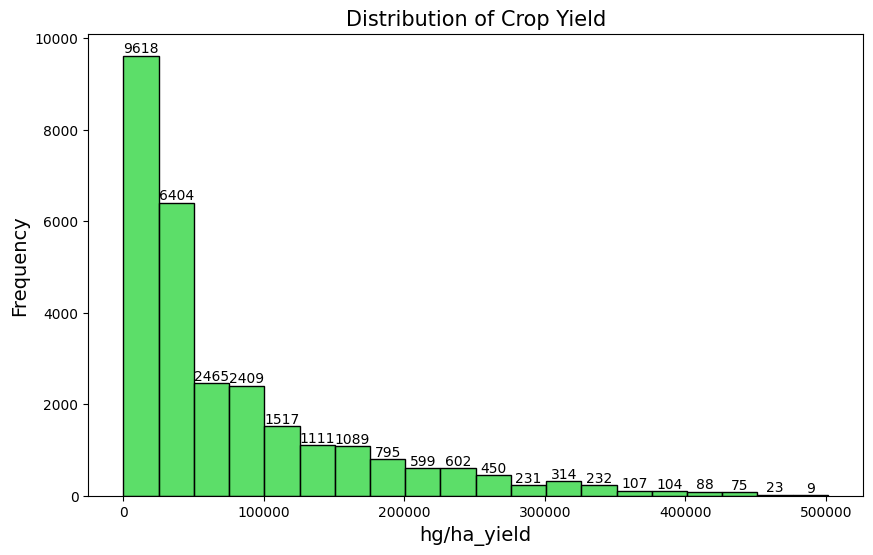

In [ ]:
# Distribution Of Crop Yield Using Histogram

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plotting the histogram using Seaborn
sns.histplot(df['hg/ha_yield'], bins=20, color='#26d437', edgecolor='black')

# Adding a title to the plot
plt.title('Distribution of Crop Yield', fontsize=15)

# Adding labels for the x and y axes
plt.xlabel('hg/ha_yield', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Getting the counts for each bin
counts, bin_edges = np.histogram(df['hg/ha_yield'], bins=20)

# Displaying the counts for each bin
for count, bin_edge in zip(counts, bin_edges[:-1]):
    plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, str(count),
             ha='center', va='bottom')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> Histograms  is a suitable choice for visualizing the distribution of 'hg/ha_yield,' which is a continuous variable representing crop yield per hectare. The x-axis of the histogram represents the range of 'hg/ha_yield' values grouped into bins, while the y-axis shows the frequency or count of observations within each bin.

##### 2. What is/are the insight(s) found from the chart?

> - The majority of observations fall within the first few bins, with counts around **9618** and **6404**. This indicates that there is a common range of values for 'hg/ha_yield' that occur frequently.
> - There may be a few outliers on the right side of the distribution, as indicated by the lower counts in the last few bins (e.g., 23, 9). These bins may represent extreme values that are less common in the dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> - Understanding the most common range of 'hg/ha_yield' values (higher counts) can help businesses optimize their resources, focusing on areas or products that are more likely to yield positive outcomes.

#### Chart - 2 Distribution of Crop Types

<ipython-input-85-e38ad9ce83a2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item', data=df, palette='autumn')


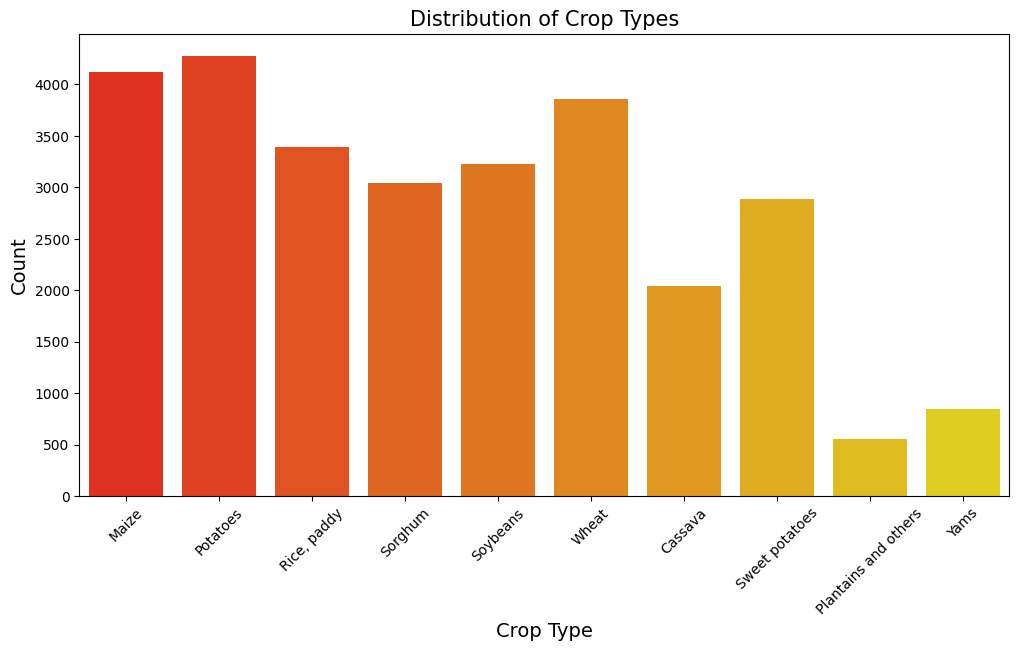

In [ ]:
# Distribution of Crop Types Using Seaborn Bar Plot

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Creating a Seaborn bar plot for the distribution of crop types
sns.countplot(x='Item', data=df, palette='autumn')

# Adding a title to the plot
plt.title('Distribution of Crop Types', fontsize=15)

# Adding labels for the x and y axes
plt.xlabel('Crop Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> the bar plot is a suitable choice for visualizing because it aligns well with the categorical nature of the data and facilitates a clear comparison of crop types based on their counts. It's an effective and commonly used visualization for such distributions.

##### 2. What is/are the insight(s) found from the chart?

> - Potatoes, Maize, and Wheat are the most frequently occurring crops in the dataset, as they have the highest counts. These crops seem to dominate in terms of cultivation or observation.
> - Yams, Plantains, and others have lower counts, indicating that these crops are less commonly observed or cultivated compared to others in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> - By understanding the most common crops (e.g., Potatoes, Maize, Wheat), businesses can optimize their resources, focusing on the cultivation, production, or marketing of these high-demand crops.
> - Identifying less common crops (e.g., Yams, Plantains) may present opportunities for diversification. Exploring these less common crops could tap into niche markets or cater to specific consumer preferences.

#### Chart - 3  How crop production changed in years

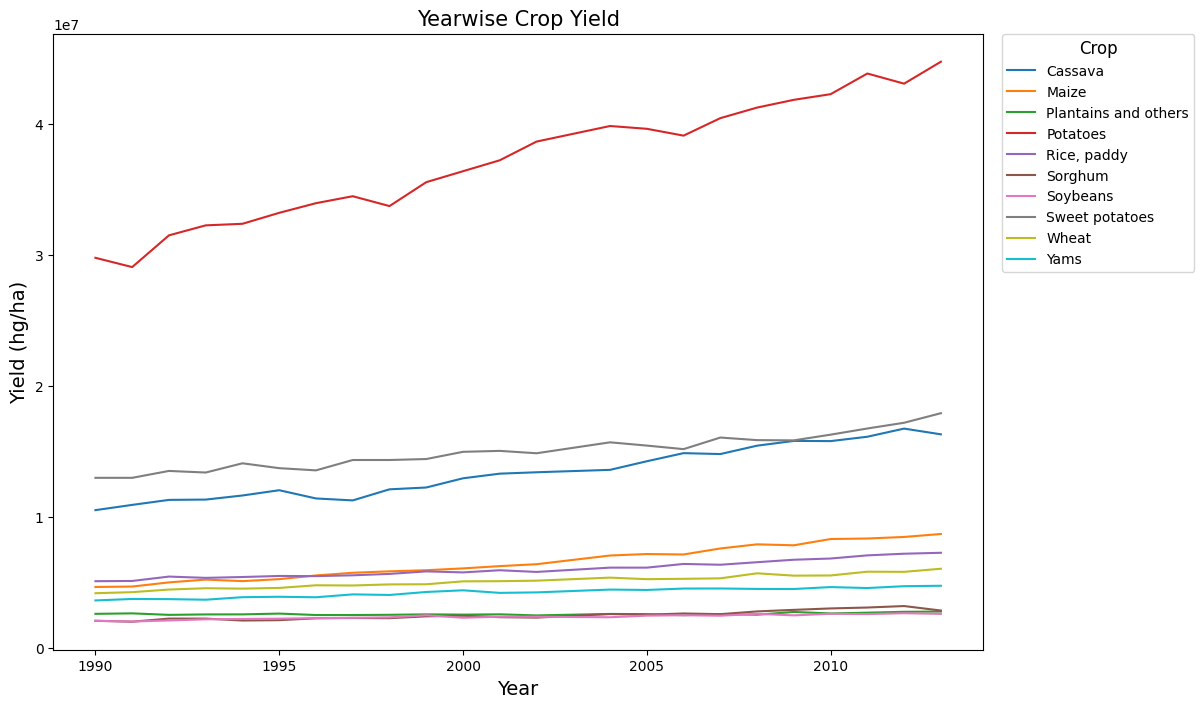

In [ ]:

# Creating dataframe for crops, yield according to year
df2 = df.groupby(['Item', 'Year'])['hg/ha_yield'].sum().reset_index()

# Setting the size of the figure
plt.figure(figsize=(12, 8))

# Plotting the data using Seaborn lineplot
sns.lineplot(data=df2, x='Year', y='hg/ha_yield', hue='Item')

# Adding a title to the plot
plt.title('Yearwise Crop Yield', fontsize=15)

# Adding labels for the x and y axes
plt.xlabel('Year', fontsize=14)
plt.ylabel('Yield (hg/ha)', fontsize=14)

# Displaying the legend
plt.legend(title='Crop', title_fontsize='12',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> The line chart is suitable for visualizing because Line plots are effective for displaying trends over time. In this case, the x-axis represents the years, and the y-axis represents the crop yield. The lines connecting data points provide a clear visual representation of how the crop yield changes across different years.

##### 2. What is/are the insight(s) found from the chart?

> -  Over the years 1990 to 2010, the yield of Sweet Potatoes shows a consistent increasing trend. The values steadily rise from 1990 to 2010, indicating a positive and continuous growth in Sweet Potatoes production.
> - Cassava and Potatoes are consistently high-yielding crops throughout the observed years. Potatoes, in particular, has a substantial yield, reaching  (2010). These crops have maintained their dominance in production over the entire period.
> -  The yield of Rice, Paddy demonstrates steady growth over the years. The values gradually increase in 1990 to 2010 , indicating a positive trend in Rice production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> - Fluctuations in the yield of Maize and Wheat can be a concern for businesses relying heavily on these crops. Sudden changes in production may be influenced by factors like weather conditions or market demand, leading to potential challenges in planning.
> - The slight variability in Plantains and others without a clear upward trend might indicate a potential stagnation in production. Businesses may need to assess market demand and explore strategies to stimulate growth in this category.

#### Chart - 4

In [ ]:
import geopandas as gpd

In [ ]:
# Chart - 4 visualization code
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on='NAME', right_on='Area', how='left')

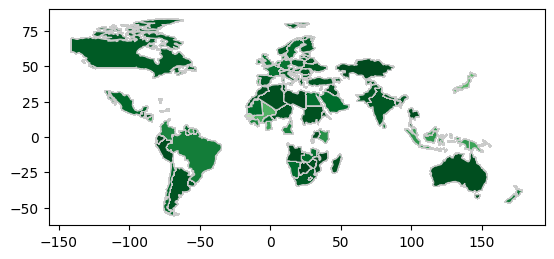

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
# plt.title("Countries")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

> Hypothetical Statement 1:
> * **Null Hypothesis**: There is no significant difference in crop yields between the years 2000 and 2010.
> * **Alternative Hypothesis**: There is a significant difference in crop yields between the years 2000 and 2010.

> Hypothetical Statement 2:
> * **Null Hypothesis**: The average crop yield is the same across different countries in the dataset.
> * **Alternative Hypothesis**: There is a significant difference in average crop yield among different countries in the dataset.

> Hypothetical Statement 3:
> * **Null Hypothesis**: There is no significant correlation between the average temperature and crop yield in the dataset.
> * **Alternative Hypothesis**: There is a significant correlation between the average temperature and crop yield in the dataset.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> * **Null Hypothesis**: There is no significant difference in crop yields between the years 2000 and 2010.
> * **Alternative Hypothesis**: There is a significant difference in crop yields between the years 2000 and 2010.


#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind

# Create separate dataframes for crop yields in the years 2000 and 2010
crop_yield_2000 = df[df['Year'] == 2000]['hg/ha_yield']
crop_yield_2010 = df[df['Year'] == 2010]['hg/ha_yield']

# Perform two-sample t-test
t, p = ttest_ind(crop_yield_2000, crop_yield_2010, equal_var=False)

# Print the results
print('t-value:', t)
print('p-value:', p)

# Set the significance level
alpha = 0.05

# Print the interpretation of the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in crop yields between 2000 and 2010.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in crop yields between 2000 and 2010.")


t-value: -3.1268569466428557
p-value: 0.0017875797161740453
Reject the null hypothesis. There is a significant difference in crop yields between 2000 and 2010.


##### Which statistical test have you done to obtain P-Value?

> The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

> This test is used to compare the means of two independent samples (crop yields in the years 2000 and 2010) to determine if there is a significant difference.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> * **Null Hypothesis**: The average crop yield is the same across different countries in the dataset.
> * **Alternative Hypothesis**: There is a significant difference in average crop yield among different countries in the dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import f_oneway

areas = df['Area'].unique()
crop_yield_by_area = [df[df['Area'] == area]['hg/ha_yield'] for area in areas]

# Perform one-way ANOVA test
f_stat, p = f_oneway(*crop_yield_by_area)

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p)

# Set the significance level
alpha = 0.05

# Print the interpretation of the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in average crop yield among different areas.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average crop yield among different areas.")


F-statistic: 48.0131527054039
p-value: 0.0
Reject the null hypothesis. There is a significant difference in average crop yield among different areas.


##### Which statistical test have you done to obtain P-Value?

> The statistical test used to obtain the P-Value is a One-way ANOVA test

##### Why did you choose the specific statistical test?

> This test is used to compare the means of three or more independent groups (crop yields in different areas) to determine if there is a significant difference.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> * **Null Hypothesis**: There is no significant correlation between the average temperature and crop yield in the dataset.
> * **Alternative Hypothesis**: There is a significant correlation between the average temperature and crop yield in the dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import pearsonr

# Extract relevant columns from the dataset
temperature = df['avg_temp']
crop_yield = df['hg/ha_yield']

# Perform Pearson correlation test
corr, p_value = pearsonr(temperature, crop_yield)

# Print the results
print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)

# Set the significance level
alpha = 0.05

# Print the interpretation of the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between average temperature and crop yield.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between average temperature and crop yield.")


Pearson correlation coefficient: -0.11477695959121151
p-value: 1.968306080457806e-83
Reject the null hypothesis. There is a significant correlation between average temperature and crop yield.


##### Which statistical test have you done to obtain P-Value?

> The statistical test used to obtain the P-Value is a Pearson correlation test

##### Why did you choose the specific statistical test?

> This test is used to assess the strength and direction of a linear relationship between two continuous variables (average temperature and crop yield).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df.isna().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

 Let's move ahead, as our dataet doe not contain any null values.

#### What all missing value imputation techniques have you used and why did you use those techniques?

> There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
#@markdown # Outlier detector
def Outlier_detector(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
# Defining  empty lists for different Datatypes
numeric_columns = []
# Seprating columns and categorize based on data type
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
      numeric_columns.append(column)

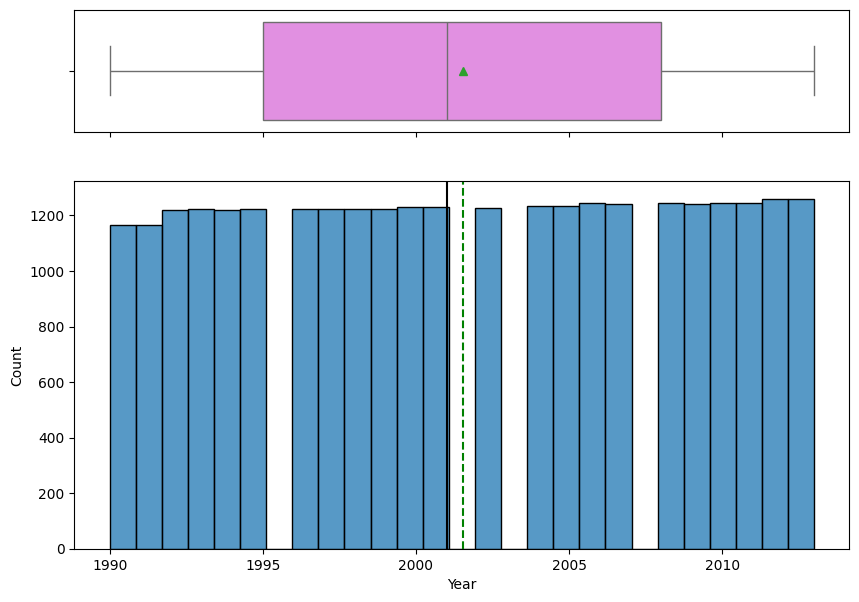

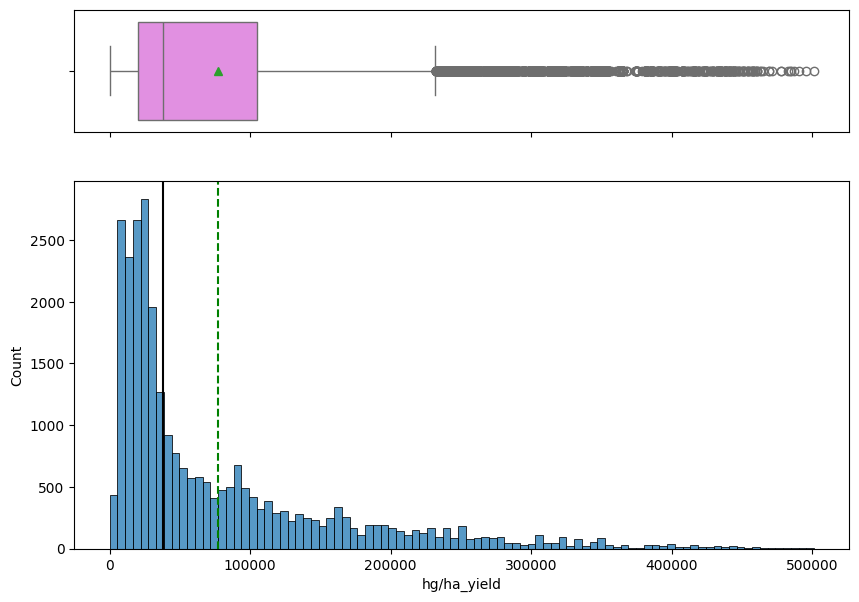

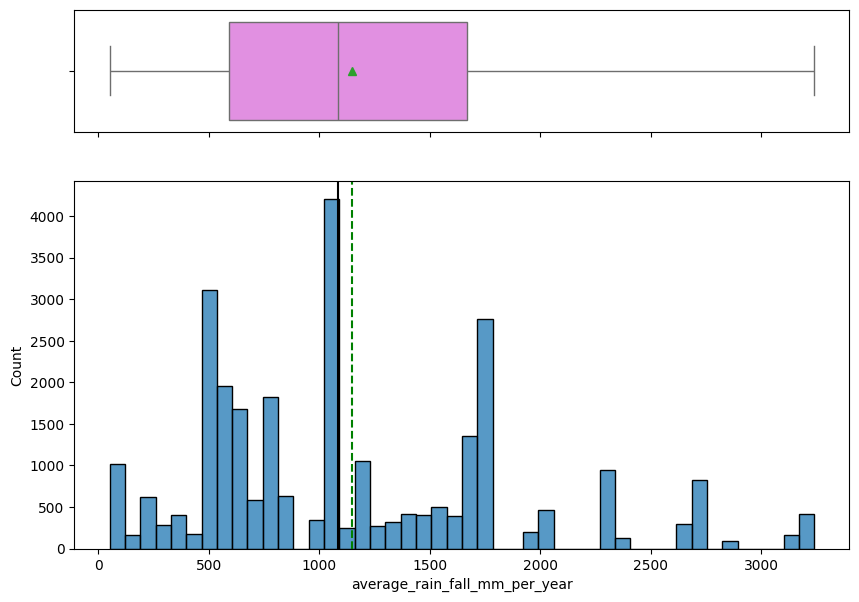

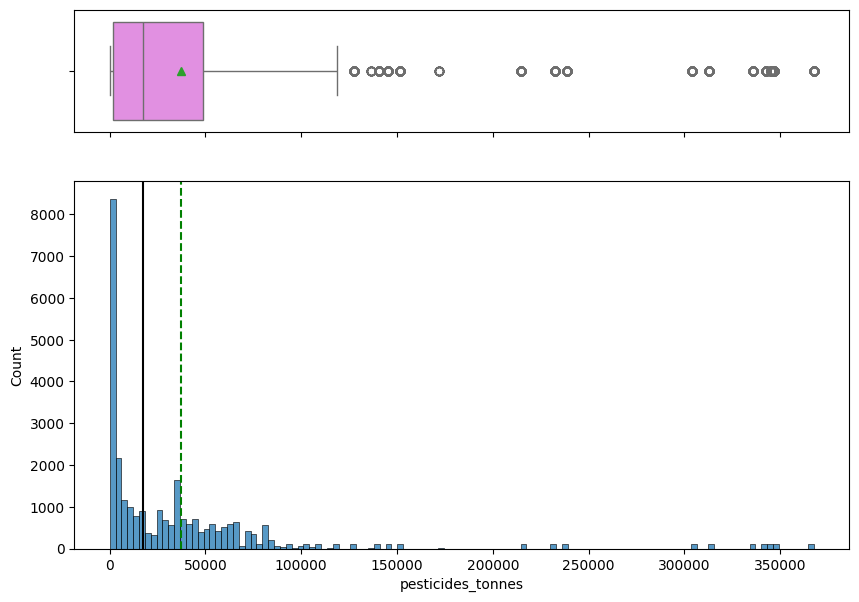

In [ ]:
for variable in numeric_columns[:-1]:
  Outlier_detector(df,variable)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***